# Profiling

We can evaluate the execution time of each method inside comorbuss using the `nanoprofiler` profiler, to install it:

    python -m pip install nanoprofiler

### Imports required libraries

In [1]:
import os
import numpy as np
from nanoprofiler import Profiler
from comorbuss import community
from comorbuss.tools import load_parameters_json, save_hdf5

### Setup parameters, one parameter can be varied during profiling

In [2]:
parameter = "number_of_particles"
name = "Number of Particles"
seeds = np.arange(1,6)
interation_values = np.arange(5000, 15001, 2500)
fixed_parameters = {
    'store_time_series': False,
}

# Determines working folder for results
outdirec = os.path.join("out", "profiling")
if os.path.isdir(outdirec) == False:
        os.makedirs(outdirec)
out = os.path.join(outdirec, parameter)

### Run code with profiler

In [3]:
parameters = {}+
for key in fixed_parameters.keys():
    parameters[key] = fixed_parameters[key]
pr = Profiler()
for value in interation_values:
    parameters[parameter] = value
    print("Executing {} = {}".format(parameter, value))
    for seed in seeds:
        print("    Starting seed {}.".format(seed))
        parameters["random_seed"] = seed
        pr.start(name=str(value))
        comm = community(**parameters)
        comm.simulate()
        pr.stop()
        save_hdf5([comm], out+"_{:}.hdf5".format(value))
        del comm
pr.save_results(outdirec, parameter)

Executing number_of_particles = 5000
    Starting seed 1.
[Progress] Initialization took 3.89 seconds [step: 0, day: 0, hour: 0.0]
[Progress] Initialization OK, starting simulation [step: 0, day: 0, hour: 0.0]
[Progress] 100% |████████████████████████| 60.0/60.0 days [ 2.32s/day, 0.0s rem]
[Progress] Simulation took 138.94 seconds [step: 1439, day: 59, hour: 23.0]
[Results] Number of infections: 2256
[Results] Number of asymptomatic cases: 1166
[Results] Number of light symptomatic cases: 659
[Results] Number of severe symptomatic: 169
[Results] Number of deaths: 18
[Results] Infections at home: 1253
[Results] Infections on environment: 80
[Results] Infections on Markets: 282
[Results] Infections on Hospitals: 12
[Results] Infections on Schools: 477
[Results] Infections on Restaurants: 102
    Starting seed 2.
[Progress] Initialization took 3.96 seconds [step: 0, day: 0, hour: 0.0]
[Progress] Initialization OK, starting simulation [step: 0, day: 0, hour: 0.0]
[Progress] Simulation took

#### \[Optional\] Load data from previously profiling

In [3]:
pr = Profiler()
pr.load_results(outdirec, parameter)

### Plots the results stored in the `profiler` object

Unnamed: 0       ncalls  tottime  percall_tottime  cumtime  \
0             4      18901.0   17.178            0.001   26.178   
1             1       1439.0   14.640            0.010  113.022   
2            11     738003.0    8.565            0.000   14.875   
3            13    2031549.0    6.826            0.000    6.826   
4             5       1439.0    6.674            0.005   22.398   
..          ...          ...      ...              ...      ...   
245        1888    5800941.0   20.381            0.000   20.381   
246        1904    2984250.0   13.350            0.000   13.350   
247        1881    2191431.0   12.924            0.000   53.442   
248        1899    3897212.0   12.311            0.000   14.852   
249        1906  259980321.0   12.194            0.000   12.194   

     percall_cumtime                  function           filename  \
0              0.001                 normalize           tools.py   
1              0.079  gen_encounters_masks_net      population.py   
2              0.000            to_numpy_array  convert_matrix.py   
3              0.000                     array          ['numpy']   
4              0.016             update_states      population.py   
..               ...                       ...                ...   
245            0.000                     array          ['numpy']   
246            0.000                    reduce        numpy.ufunc   
247            0.000          gnp_random_graph   random_graphs.py   
248            0.000            add_nodes_from           graph.py   
249            0.000                    append               list   

                                                 direc   line  \
0    /home/nano/Apps/anaconda3/lib/python3.7/site-p...   30.0   
1    /home/nano/Apps/anaconda3/lib/python3.7/site-p...  710.0   
2    /home/nano/Apps/anaconda3/lib/python3.7/site-p...  980.0   
3                                                  NaN    NaN   
4    /home/nano/Apps/anaconda3/lib/python3.7/site-p...  813.0   
..                                                 ...    ...   
245                                                NaN    NaN   
246                                                NaN    NaN   
247  /home/nano/Apps/anaconda3/lib/python3.7/site-p...  123.0   
248  /home/nano/Apps/anaconda3/lib/python3.7/site-p...  523.0   
249                                                NaN    NaN   

                                      short_name  execution_id  \
0                         normalize:30(tools.py)             0   
1    gen_encounters_masks_net:710(population.py)             0   
2          to_numpy_array:980(convert_matrix.py)             0   
3                                    numpy.array             0   
4               update_states:813(population.py)             0   
..                                           ...           ...   
245                                  numpy.array             4   
246                          reduce(numpy.ufunc)             4   
247       gnp_random_graph:123(random_graphs.py)             4   
248                 add_nodes_from:523(graph.py)             4   
249                                 append(list)             4   

     execution_name  tottime_perc  cumtime_perc  
0              5000     11.987355     18.267842  
1              5000     10.216258     78.870350  
2              5000      5.976930     10.380249  
3              5000      4.763400      4.763400  
4              5000      4.657330     15.630037  
..              ...           ...           ...  
245           15000      4.051961      4.051961  
246           15000      2.654123      2.654123  
247           15000      2.569430     10.624842  
248           15000      2.447559      2.952737  
249           15000      2.424298      2.424298  

[250 rows x 15 columns]

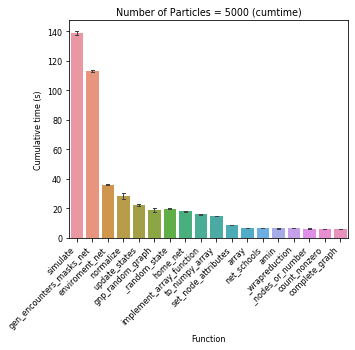

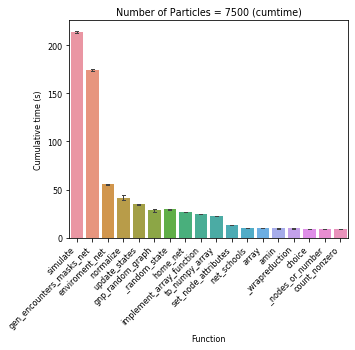

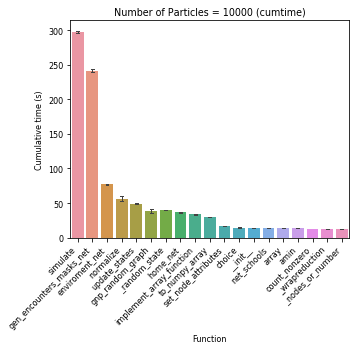

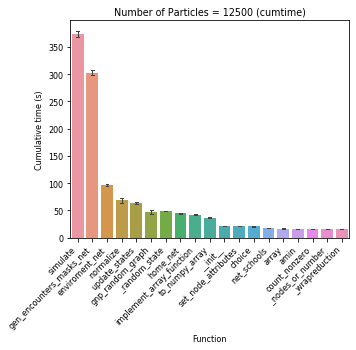

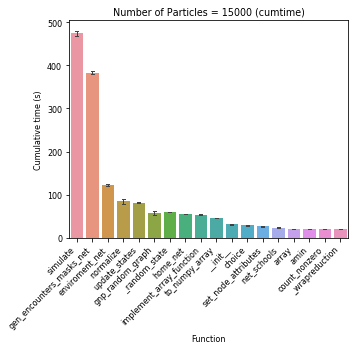

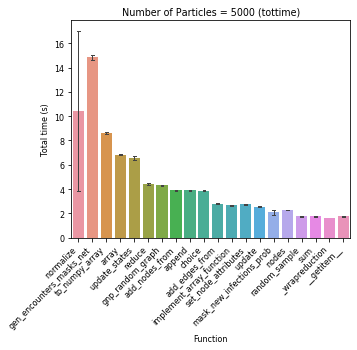

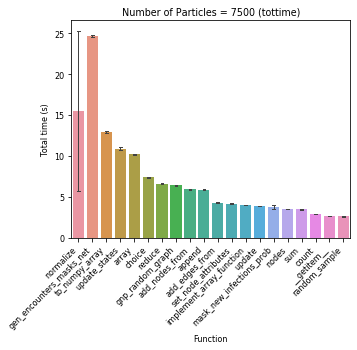

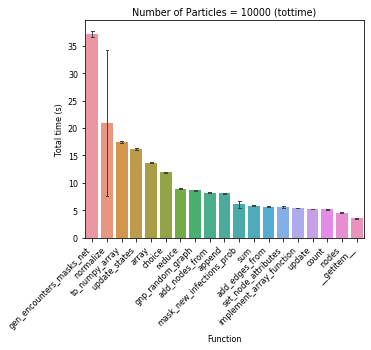

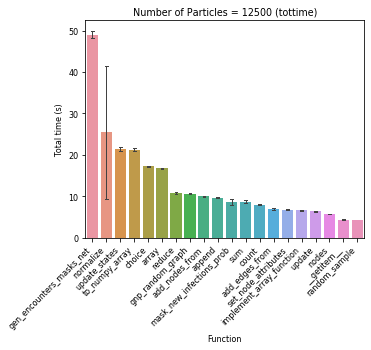

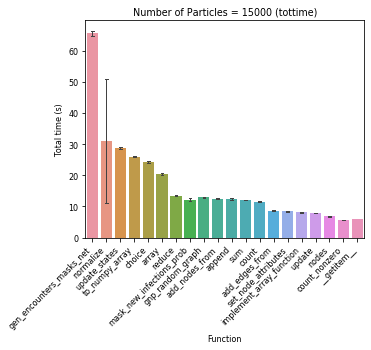

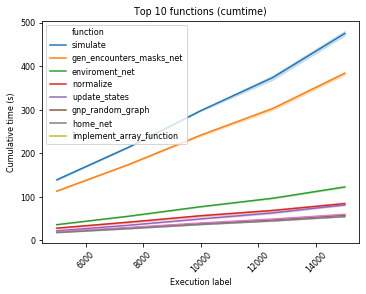

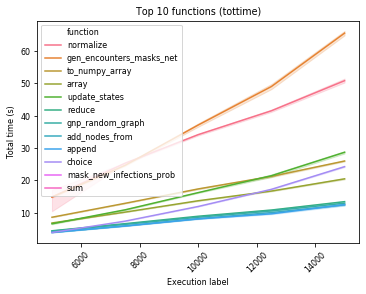

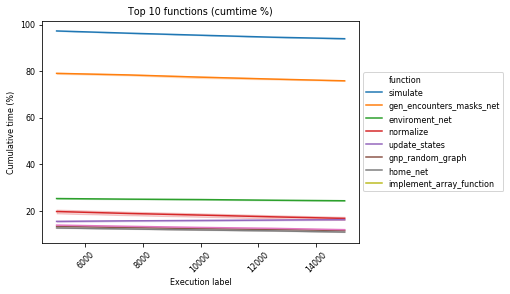

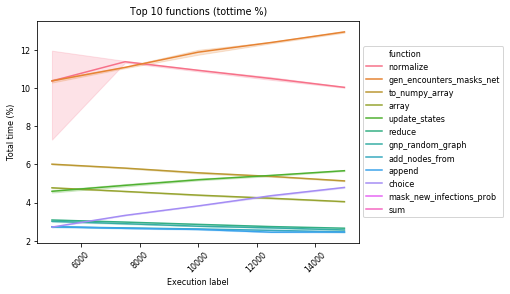

In [4]:
pr.plot_top_time(filename=out, time="cumtime", title=name+" = ", n=20)
pr.plot_top_time(filename=out, time="tottime", title=name+" = ", n=20)
pr.plot_function(filename=out+"_top10_func_cumtime.pdf", n=10, time="cumtime", title="Top 10 functions (cumtime)")
pr.plot_function(filename=out+"_top10_func_tottime.pdf", n=10, time="tottime", title="Top 10 functions (tottime)")
pr.plot_function(filename=out+"_top10_func_cumtime_percent.pdf", n=10, percent=True, legend_outside=True, size=(7, 4), time="cumtime", title="Top 10 functions (cumtime %)")
pr.plot_function(filename=out+"_top10_func_tottime_percent.pdf", n=10, percent=True, legend_outside=True, size=(7, 4), time="tottime", title="Top 10 functions (tottime %)")

### \[Optional\] Uses PyCallGraph and Graphviz to draw execution map of all calls and times (Resource intense)

In [ ]:
from pycallgraph import PyCallGraph
from pycallgraph.output import GraphvizOutput

parameters = load_parameters_json(DEF_CONFIG)
for key in fixed_parameters.keys():
    parameters[key] = fixed_parameters[key]
for value in interation_values:
    parameters[parameter] = value
    print("Executing {} = {}".format(parameter, value))
    graphviz = GraphvizOutput()
    graphviz.output_file = out+"_{:}.svg".format(value)
    graphviz.output_type = 'svg'
    ti = time.time()
    comm1 = community(**parameters)
    with PyCallGraph(output=graphviz):
        comm1.simulate()
    tf = time.time()
    exec_time = tf - ti
    print('[Execution time {:.2f} s]'.format(exec_time))